<a href="https://colab.research.google.com/github/mishrashaurya2004/asthmaPredictionModel/blob/main/ML_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/asthma_dataset.csv')

In [ ]:
df.head()

,Age,Gender,Smoking_Habit,Alcohol_Consumption,Physical_Activity,BMI,Lung_Fitness_Score,Respiratory_Rate,Oxygen_Level,Allergy_History,Environmental_Exposure,Family_History_Asthma,Asthma_Probability
0,56,Female,Yes,3,9,29.4,79,25,85,No,5,No,Yes
1,69,Male,Yes,3,13,20.9,33,18,88,No,2,No,Yes
2,46,Female,No,14,8,30.3,77,14,96,No,1,No,Yes
3,32,Female,No,3,3,26.6,61,28,98,Yes,6,No,No
4,60,Male,Yes,8,9,29.6,80,21,96,No,5,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2000 non-null   int64  
 1   Gender                  2000 non-null   object 
 2   Smoking_Habit           2000 non-null   object 
 3   Alcohol_Consumption     2000 non-null   int64  
 4   Physical_Activity       2000 non-null   int64  
 5   BMI                     2000 non-null   float64
 6   Lung_Fitness_Score      2000 non-null   int64  
 7   Respiratory_Rate        2000 non-null   int64  
 8   Oxygen_Level            2000 non-null   int64  
 9   Allergy_History         2000 non-null   object 
 10  Environmental_Exposure  2000 non-null   int64  
 11  Family_History_Asthma   2000 non-null   object 
 12  Asthma_Probability      2000 non-null   object 
dtypes: float64(1), int64(7), object(5)
memory usage: 203.3+ KB


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Smoking_Habit'] = df['Smoking_Habit'].map({'No': 0, 'Yes': 1})
df['Allergy_History'] = df['Allergy_History'].map({'No': 0, 'Yes': 1})
df['Family_History_Asthma'] = df['Family_History_Asthma'].map({'No': 0, 'Yes': 1})
df['Asthma_Probability'] = df['Asthma_Probability'].map({'No': 0, 'Yes': 1})

In [ ]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

Age                       0
Gender                    0
Smoking_Habit             0
Alcohol_Consumption       0
Physical_Activity         0
BMI                       0
Lung_Fitness_Score        0
Respiratory_Rate          0
Oxygen_Level              0
Allergy_History           0
Environmental_Exposure    0
Family_History_Asthma     0
Asthma_Probability        0
dtype: int64


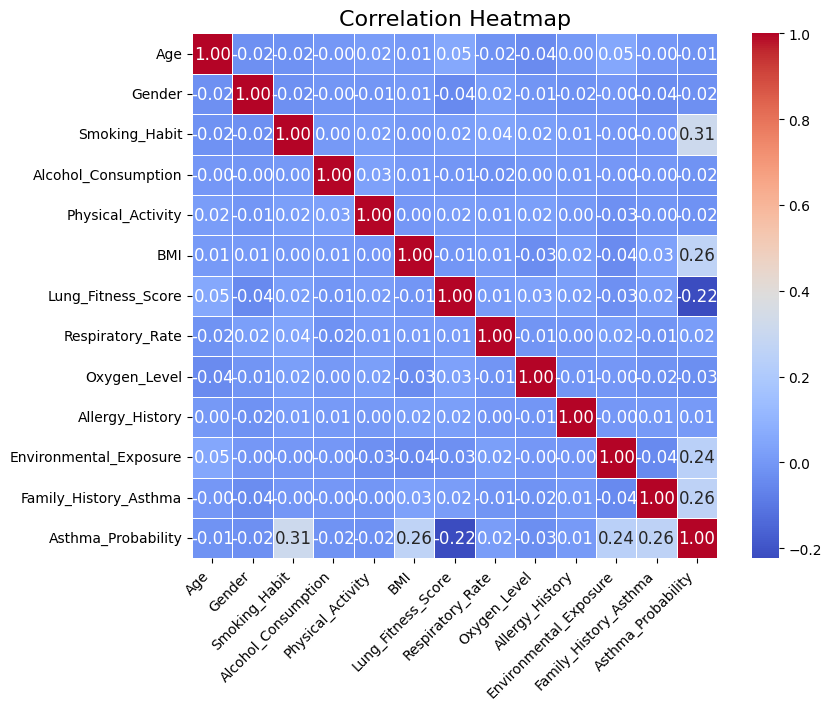

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True, annot_kws={"size": 12})  # Increased annotation font size
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Age Distribution by Asthma Probability')

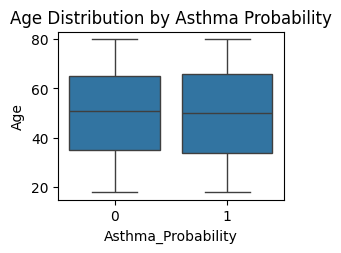

In [ ]:
plt.subplot(2, 2, 2)
sns.boxplot(x='Asthma_Probability', y='Age', data=df)
plt.title('Age Distribution by Asthma Probability')

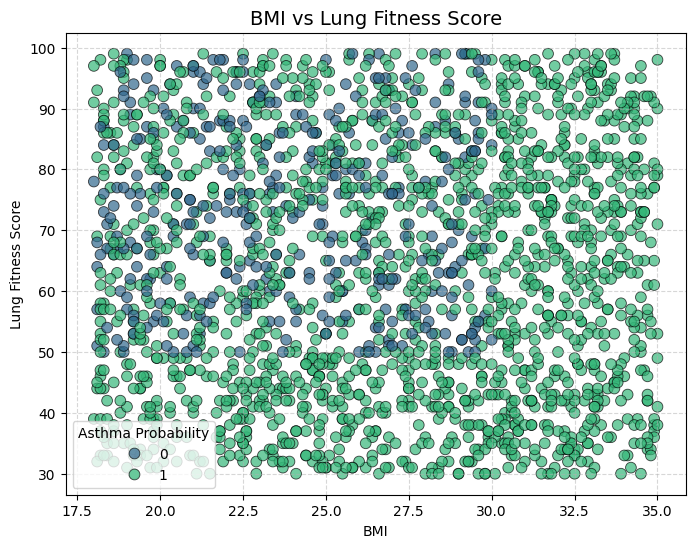

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='BMI', y='Lung_Fitness_Score', hue='Asthma_Probability',palette='viridis', alpha=0.7, edgecolor='black', s=60)
plt.title('BMI vs Lung Fitness Score', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Lung Fitness Score')
plt.legend(title='Asthma Probability')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Text(0.5, 1.0, 'Environmental Exposure vs Oxygen Level')

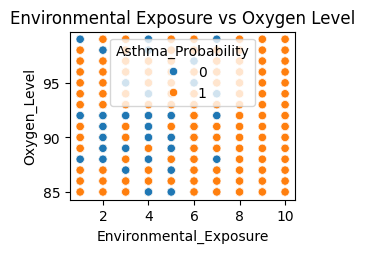

In [ ]:
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Environmental_Exposure', y='Oxygen_Level', hue='Asthma_Probability')
plt.title('Environmental Exposure vs Oxygen Level')

In [ ]:
X = df.drop(['Asthma_Probability'], axis=1)
y = df['Asthma_Probability']

In [ ]:
X = X.dropna()
y = y.dropna()

In [ ]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def train_and_predict(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [ ]:
def evaluate_metrics(y_test, y_pred, model, X_train, y_train):
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    return accuracy, cv_scores.mean(), cv_scores.std()

In [ ]:
def print_classification_report(model_name, accuracy, cv_mean, cv_std, y_test, y_pred):
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation scores: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_pred = train_and_predict(model, X_train, X_test, y_train)
    accuracy, cv_mean, cv_std = evaluate_metrics(y_test, y_pred, model, X_train, y_train)

    print_classification_report(model_name, accuracy, cv_mean, cv_std, y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, model_name)

    return accuracy, cv_mean

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', random_state=42)
}


Logistic Regression Results:
Accuracy: 0.8800
Cross-validation scores: 0.8831 (+/- 0.0281)

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        69
           1       0.92      0.93      0.93       331

    accuracy                           0.88       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.88      0.88      0.88       400



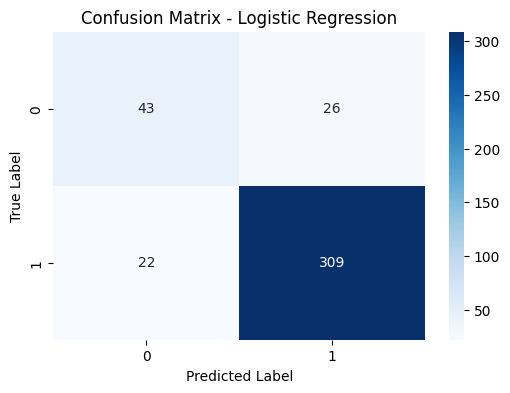


K-Nearest Neighbors Results:
Accuracy: 0.9075
Cross-validation scores: 0.8931 (+/- 0.0232)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        69
           1       0.95      0.94      0.94       331

    accuracy                           0.91       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.91      0.91      0.91       400



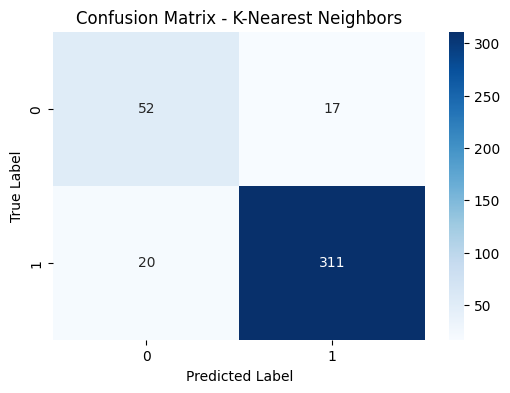


SVM Results:
Accuracy: 0.9475
Cross-validation scores: 0.9419 (+/- 0.0204)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        69
           1       0.97      0.97      0.97       331

    accuracy                           0.95       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.95      0.95      0.95       400



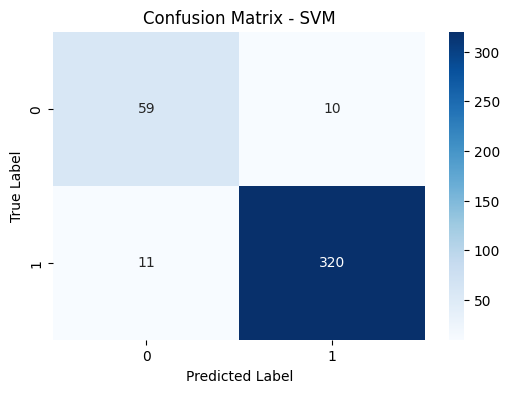

In [ ]:
results = {}
for name, model in models.items():
    accuracy, cv_score = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results[name] = {'Accuracy': accuracy, 'CV Score': cv_score}

<Figure size 1000x600 with 0 Axes>

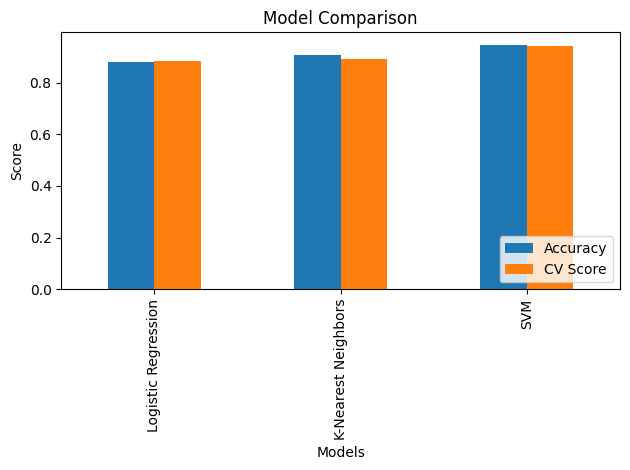

In [ ]:
plt.figure(figsize=(10, 6))
models_df = pd.DataFrame(results).T
models_df.plot(kind='bar')
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
def predict_asthma(model, scaler, input_data):
        input_df = pd.DataFrame([input_data])[X.columns].fillna(0)
        input_scaled = scaler.transform(input_df)
        pred, prob = model.predict(input_scaled)[0], model.predict_proba(input_scaled)[0]
        return pred, max(prob)

In [ ]:
print("\nFinal Model Comparison:")
print(models_df)


Final Model Comparison:
                     Accuracy  CV Score
Logistic Regression    0.8800  0.883125
K-Nearest Neighbors    0.9075  0.893125
SVM                    0.9475  0.941875


In [ ]:
best_model = models_df['Accuracy'].idxmax()
print(f"\nBest performing model: {best_model}")
print(f"Accuracy: {models_df.loc[best_model, 'Accuracy']:.4f}")
print(f"Cross-validation Score: {models_df.loc[best_model, 'CV Score']:.4f}")


Best performing model: SVM
Accuracy: 0.9475
Cross-validation Score: 0.9419


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Training data
X_train = np.array([
    [20, 0, 0, 0],
    [45, 1, 1, 1],
    [30, 0, 1, 0],
    [50, 1, 0, 1]
])
y_train = np.array([0, 1, 0, 1])

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train SVM with probability enabled
best_model = SVC(probability=True, kernel='rbf')  # You can also try 'linear' kernel
best_model.fit(X_train_scaled, y_train)

print("SVM Model trained successfully!")

# Prediction function
def predict_asthma(model, scaler, input_data):
    try:
        input_array = np.array(list(input_data.values())).reshape(1, -1)
        input_scaled = scaler.transform(input_array)
        probability = model.predict_proba(input_scaled)[0][1]
        return probability
    except Exception as e:
        print(f"Prediction Error: {e}")
        return None

# Feature names
feature_names = ['age', 'smoking', 'allergy', 'family_history']

# Interactive loop
while True:
    start_prediction = input("\nDo you want to predict asthma risk? (yes/no): ").strip().lower()

    if start_prediction == 'no':
        print("\nThank you for using the Asthma Prediction System!")
        break
    elif start_prediction != 'yes':
        print("\nInvalid response. Please enter 'yes' or 'no'.")
        continue

    try:
        input_data = {}
        for col in feature_names:
            value = float(input(f"{col.capitalize()} (0 = No, 1 = Yes for binary features): "))
            input_data[col] = value

        risk_probability = predict_asthma(best_model, scaler, input_data)

        if risk_probability is not None:
            # Risk classification
            if risk_probability > 0.75:
                risk_level = "High Risk"
            elif risk_probability > 0.50:
                risk_level = "Moderate Risk"
            elif risk_probability > 0.25:
                risk_level = "Low Risk"
            else:
                risk_level = "Minimal Risk"

            print(f"\nAsthma Risk Prediction: {risk_probability:.2%}")
            print(f"Final Assessment: {risk_level}\n")

    except ValueError:
        print("\nError: Please enter valid numerical values.")
    except Exception as e:
        print(f"\nUnexpected Error: {e}. Please try again.")


SVM Model trained successfully!

Asthma Risk Prediction: 100.00%
Final Assessment: High Risk

